# Importing Iibraries


In [12]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Ioad Data

In [2]:
df = pd.read_csv(r"/content/traffic_accidents.csv")
df

,Accident_ID,Location,Severity,Weather_Condition,Number_of_Casualties
0,1,East Thomasfort,Moderate,Clear,1
1,2,Alyssaborough,Moderate,Fog,9
2,3,Woodmouth,Minor,Clear,1
3,4,Schultzland,Minor,Fog,8
4,5,Brownberg,Minor,Fog,0
...,...,...,...,...,...
95,96,West Cathyside,Severe,Clear,3
96,97,Davisbury,Moderate,Rain,6
97,98,West Charlesfort,Moderate,Fog,9
98,99,East Carrie,Severe,Fog,1


# Data Exploration and Cleaning


In [3]:
df.head()

,Accident_ID,Location,Severity,Weather_Condition,Number_of_Casualties
0,1,East Thomasfort,Moderate,Clear,1
1,2,Alyssaborough,Moderate,Fog,9
2,3,Woodmouth,Minor,Clear,1
3,4,Schultzland,Minor,Fog,8
4,5,Brownberg,Minor,Fog,0


In [4]:
df.tail()

,Accident_ID,Location,Severity,Weather_Condition,Number_of_Casualties
95,96,West Cathyside,Severe,Clear,3
96,97,Davisbury,Moderate,Rain,6
97,98,West Charlesfort,Moderate,Fog,9
98,99,East Carrie,Severe,Fog,1
99,100,Pearsonfort,Minor,Snow,0


In [5]:
df.sample(2)

,Accident_ID,Location,Severity,Weather_Condition,Number_of_Casualties
64,65,West Rebecca,Minor,Fog,3
84,85,East Austinton,Moderate,Clear,1


In [6]:
df.describe()

,Accident_ID,Number_of_Casualties
count,100.000000,100.00000
mean,50.500000,4.26000
std,29.011492,2.95973
min,1.000000,0.00000
25%,25.750000,2.00000
50%,50.500000,4.00000
75%,75.250000,7.00000
max,100.000000,9.00000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Accident_ID           100 non-null    int64 
 1   Location              100 non-null    object
 2   Severity              100 non-null    object
 3   Weather_Condition     100 non-null    object
 4   Number_of_Casualties  100 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


In [8]:
df.isnull().sum()

,0
Accident_ID,0
Location,0
Severity,0
Weather_Condition,0
Number_of_Casualties,0


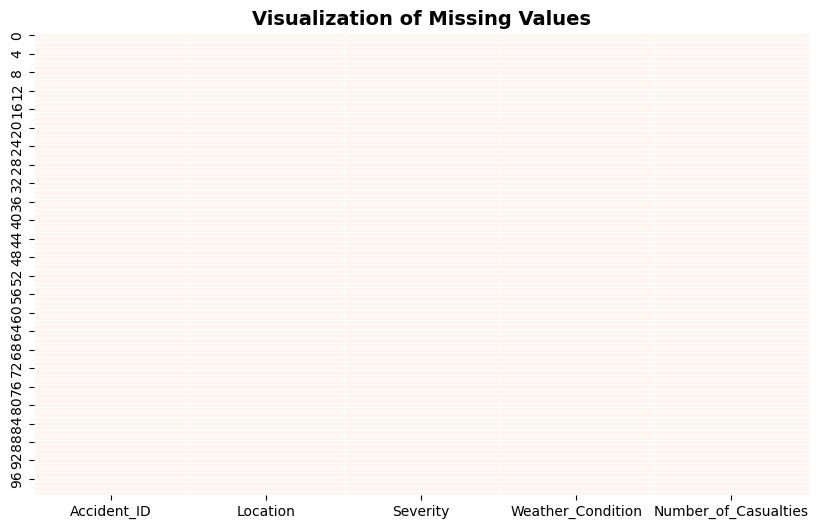

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="Reds", cbar=False, linewidths=0.5)
plt.title("Visualization of Missing Values", fontsize=14, fontweight="bold")
plt.show()


In [11]:
df.duplicated().sum()

np.int64(0)

#Data Analysis

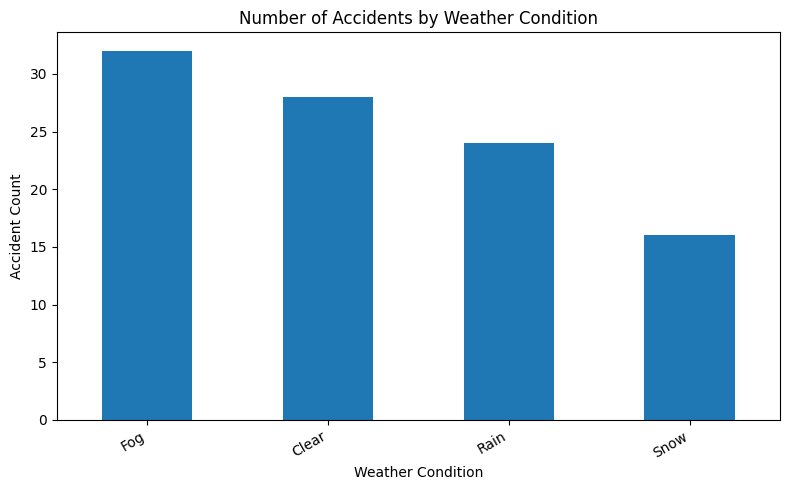

In [14]:
plt.figure(figsize=(8,5))
df['Weather_Condition'].value_counts().plot(kind='bar')
plt.title('Number of Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Accident Count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

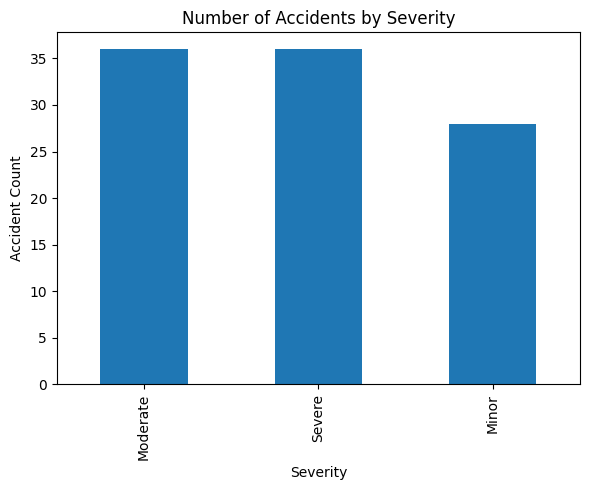

In [15]:
plt.figure(figsize=(6,5))
df['Severity'].value_counts().plot(kind='bar')
plt.title('Number of Accidents by Severity')
plt.xlabel('Severity')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

<Figure size 700x500 with 0 Axes>

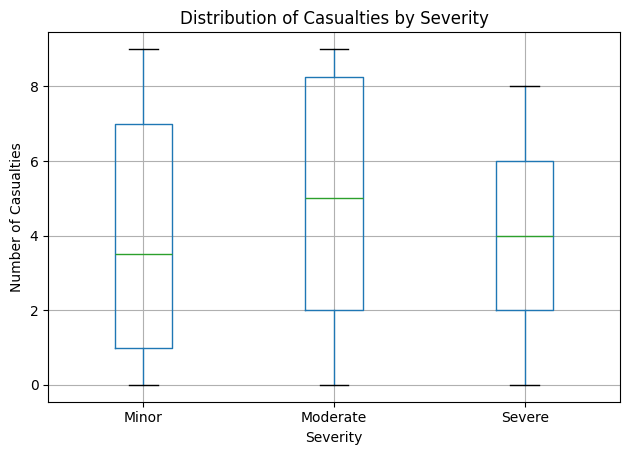

In [16]:
plt.figure(figsize=(7,5))
df.boxplot(column='Number_of_Casualties', by='Severity')
plt.title('Distribution of Casualties by Severity')
plt.suptitle('')
plt.ylabel('Number of Casualties')
plt.tight_layout()
plt.show()

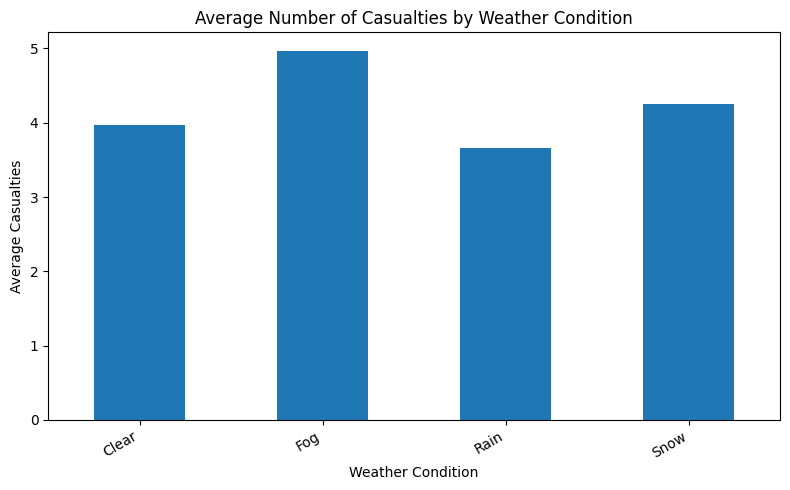

In [17]:
mean_casualties = df.groupby('Weather_Condition')['Number_of_Casualties'].mean()
plt.figure(figsize=(8,5))
mean_casualties.plot(kind='bar')
plt.title('Average Number of Casualties by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Casualties')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

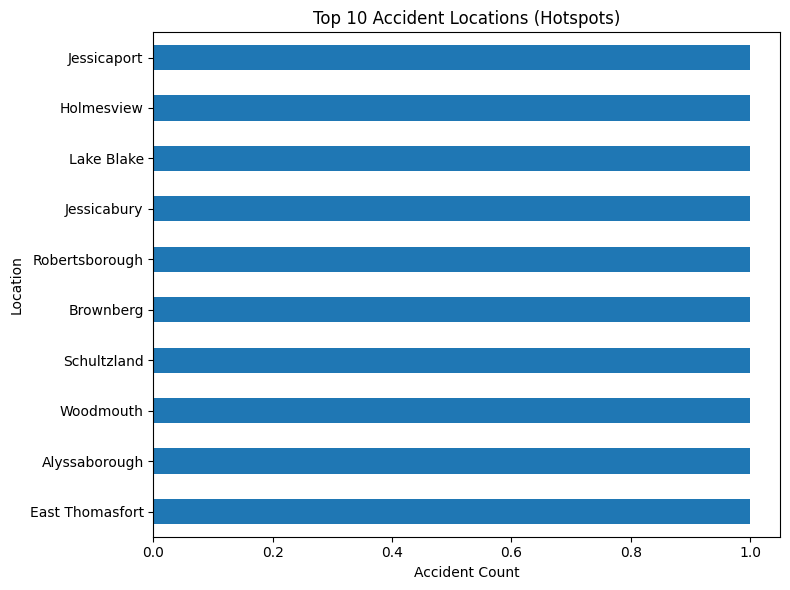

In [18]:
top_locations = df['Location'].value_counts().nlargest(10).sort_values()
plt.figure(figsize=(8,6))
top_locations.plot(kind='barh')
plt.title('Top 10 Accident Locations (Hotspots)')
plt.xlabel('Accident Count')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

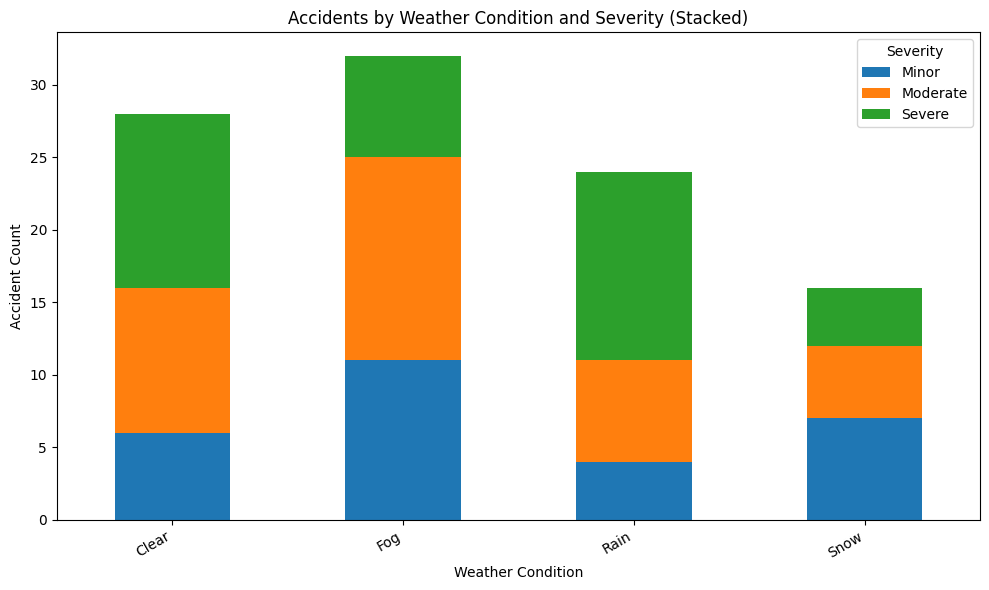

In [19]:
plt.figure(figsize=(10,6))
pd.crosstab(df['Weather_Condition'], df['Severity']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Accidents by Weather Condition and Severity (Stacked)')
plt.xlabel('Weather Condition')
plt.ylabel('Accident Count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

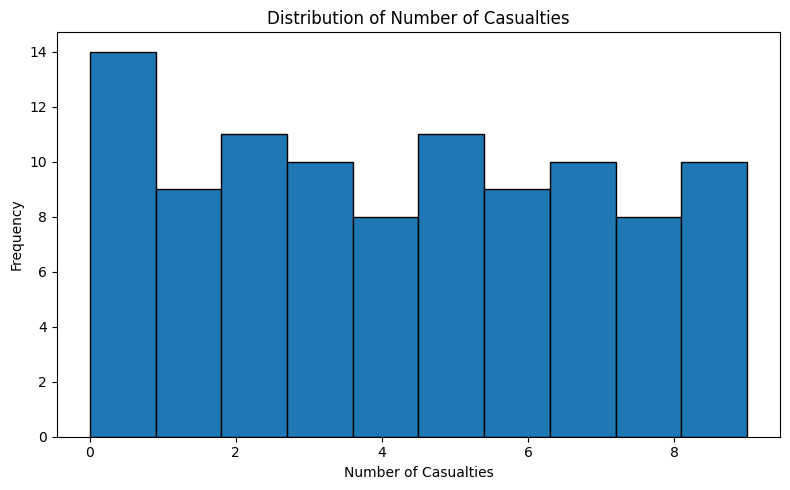

In [20]:
plt.figure(figsize=(8,5))
plt.hist(df['Number_of_Casualties'], bins=10, edgecolor='black')
plt.title('Distribution of Number of Casualties')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

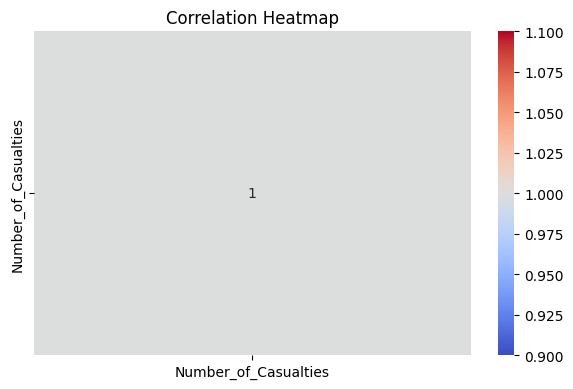

In [21]:
plt.figure(figsize=(6,4))
corr = df[['Number_of_Casualties']].corr()  # حالياً عندنا متغير عددي واحد
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

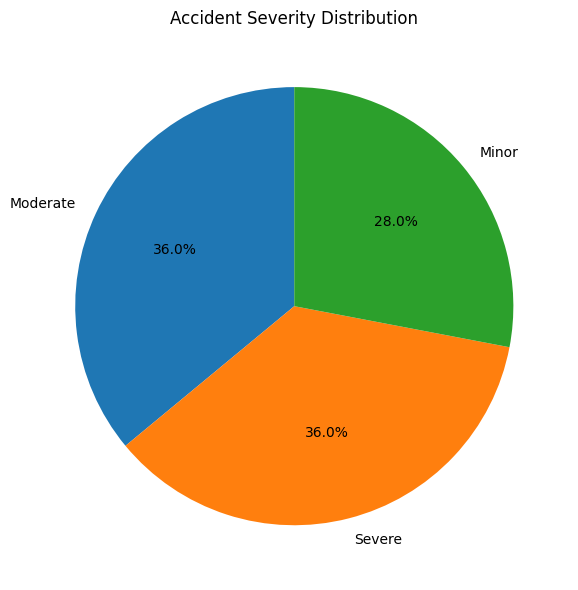

In [22]:
plt.figure(figsize=(6,6))
df['Severity'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Accident Severity Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

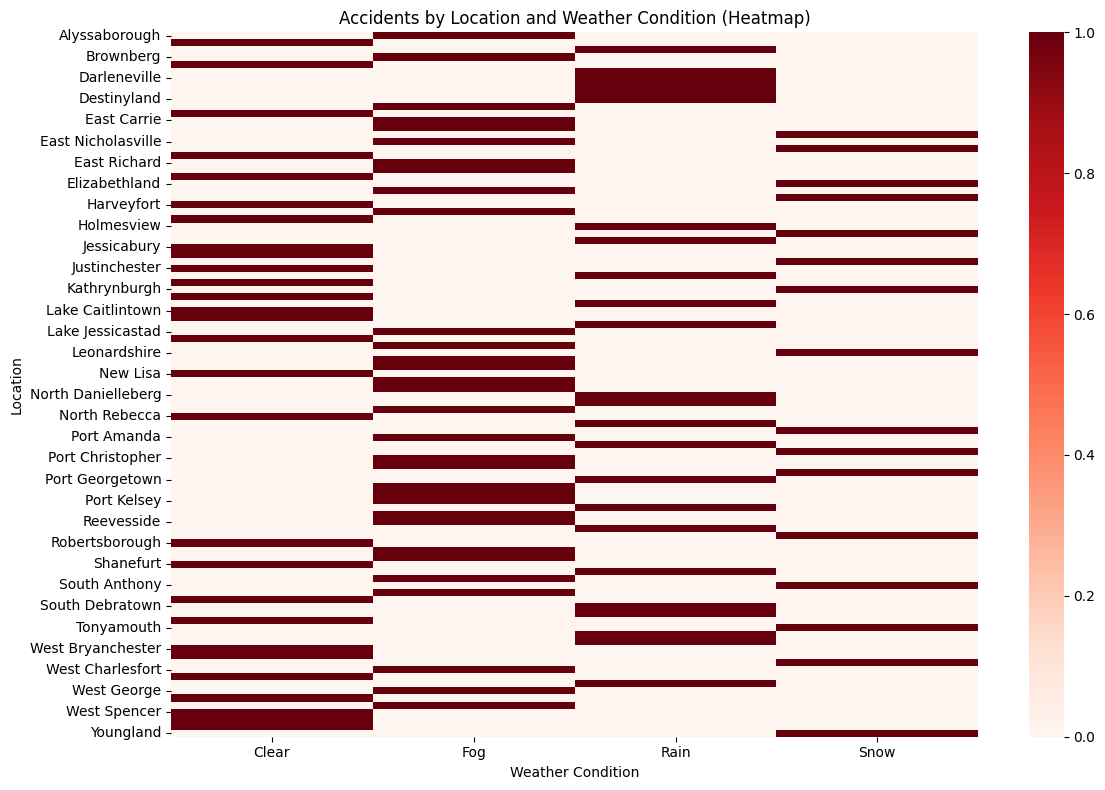

In [23]:
location_weather = pd.crosstab(df['Location'], df['Weather_Condition'])
plt.figure(figsize=(12,8))
sns.heatmap(location_weather, cmap="Reds", cbar=True)
plt.title('Accidents by Location and Weather Condition (Heatmap)')
plt.xlabel('Weather Condition')
plt.ylabel('Location')
plt.tight_layout()
plt.show()